<a href="https://colab.research.google.com/github/spoorthi212001/Profit_Prediction/blob/main/Object_Detection_using_Open_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DatumLearning/SSD_using_OpenCV.git

Cloning into 'SSD_using_OpenCV'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 21.19 MiB | 9.34 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [4]:
classNames = { 0: 'background',
1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
14: 'motorbike', 15: 'person', 16: 'pottedplant',
17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [5]:
proto = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.prototxt"
weights = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(proto , weights)

In [6]:
img = cv2.imread("/content/SSD_using_OpenCV/doggo.jpg")
img_resized = cv2.resize(img , (300 , 300))

In [7]:
blob = cv2.dnn.blobFromImage(img_resized , 0.007843 , (300 , 300) , (127.5 , 127.5 , 127.5) , False)

In [8]:
net.setInput(blob)

In [9]:
detections = net.forward()

In [12]:
final = detections.squeeze()

In [14]:
height , width , _ = img.shape

In [17]:
final.shape[0]

100

In [24]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [25]:
ig = cv2.imread("/content/SSD_using_OpenCV/doggo.jpg")
for i in range(final.shape[0]):
  conf = final[i , 2]
  if conf > 0.5:
    class_name = classNames[final[i , 1]]
    x1n , y1n ,x2n ,y2n = final[i , 3:]
    x1 = int(x1n * width)
    y1 = int(y1n * height)
    x2 = int(x2n * width)
    y2 = int(y2n * height)
    top_left = (x1 , y1)
    bottom_right = (x2 , y2)
    ig = cv2.rectangle(ig , top_left , bottom_right , (0 , 255 , 0) , 3)
    ig = cv2.putText(ig , class_name , (x1 , y1 - 10 ) , font , 0.5 , (255 , 0 , 0) , 1 ,cv2.LINE_AA)

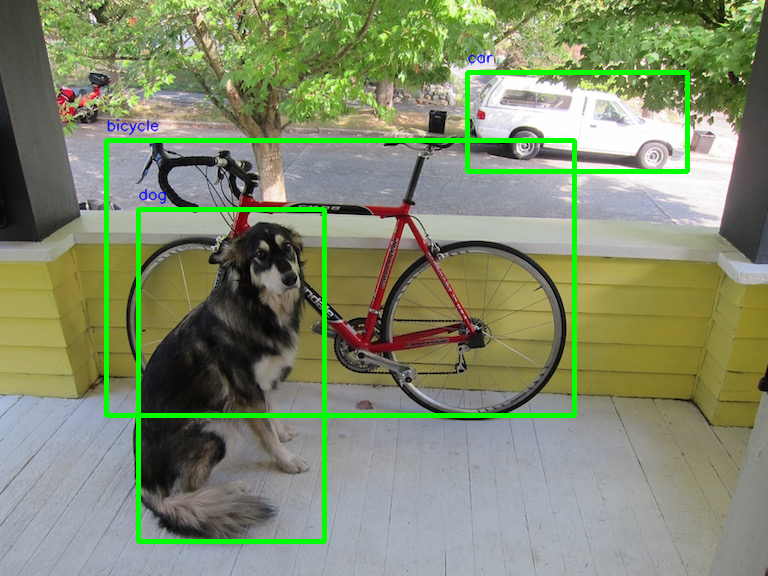

In [26]:
cv2_imshow(ig)

In [19]:
final

array([[ 0.        , 12.        ,  0.9978461 ,  0.18044814,  0.36321244,
         0.42236874,  0.9395397 ],
       [ 0.        ,  7.        ,  0.9966252 ,  0.60849637,  0.12619439,
         0.89485675,  0.29698408],
       [ 0.        ,  2.        ,  0.9950911 ,  0.13880771,  0.244614  ,
         0.74748474,  0.72084224],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.    